# **Semi-Supervised Learning using USB built upon PyTorch**

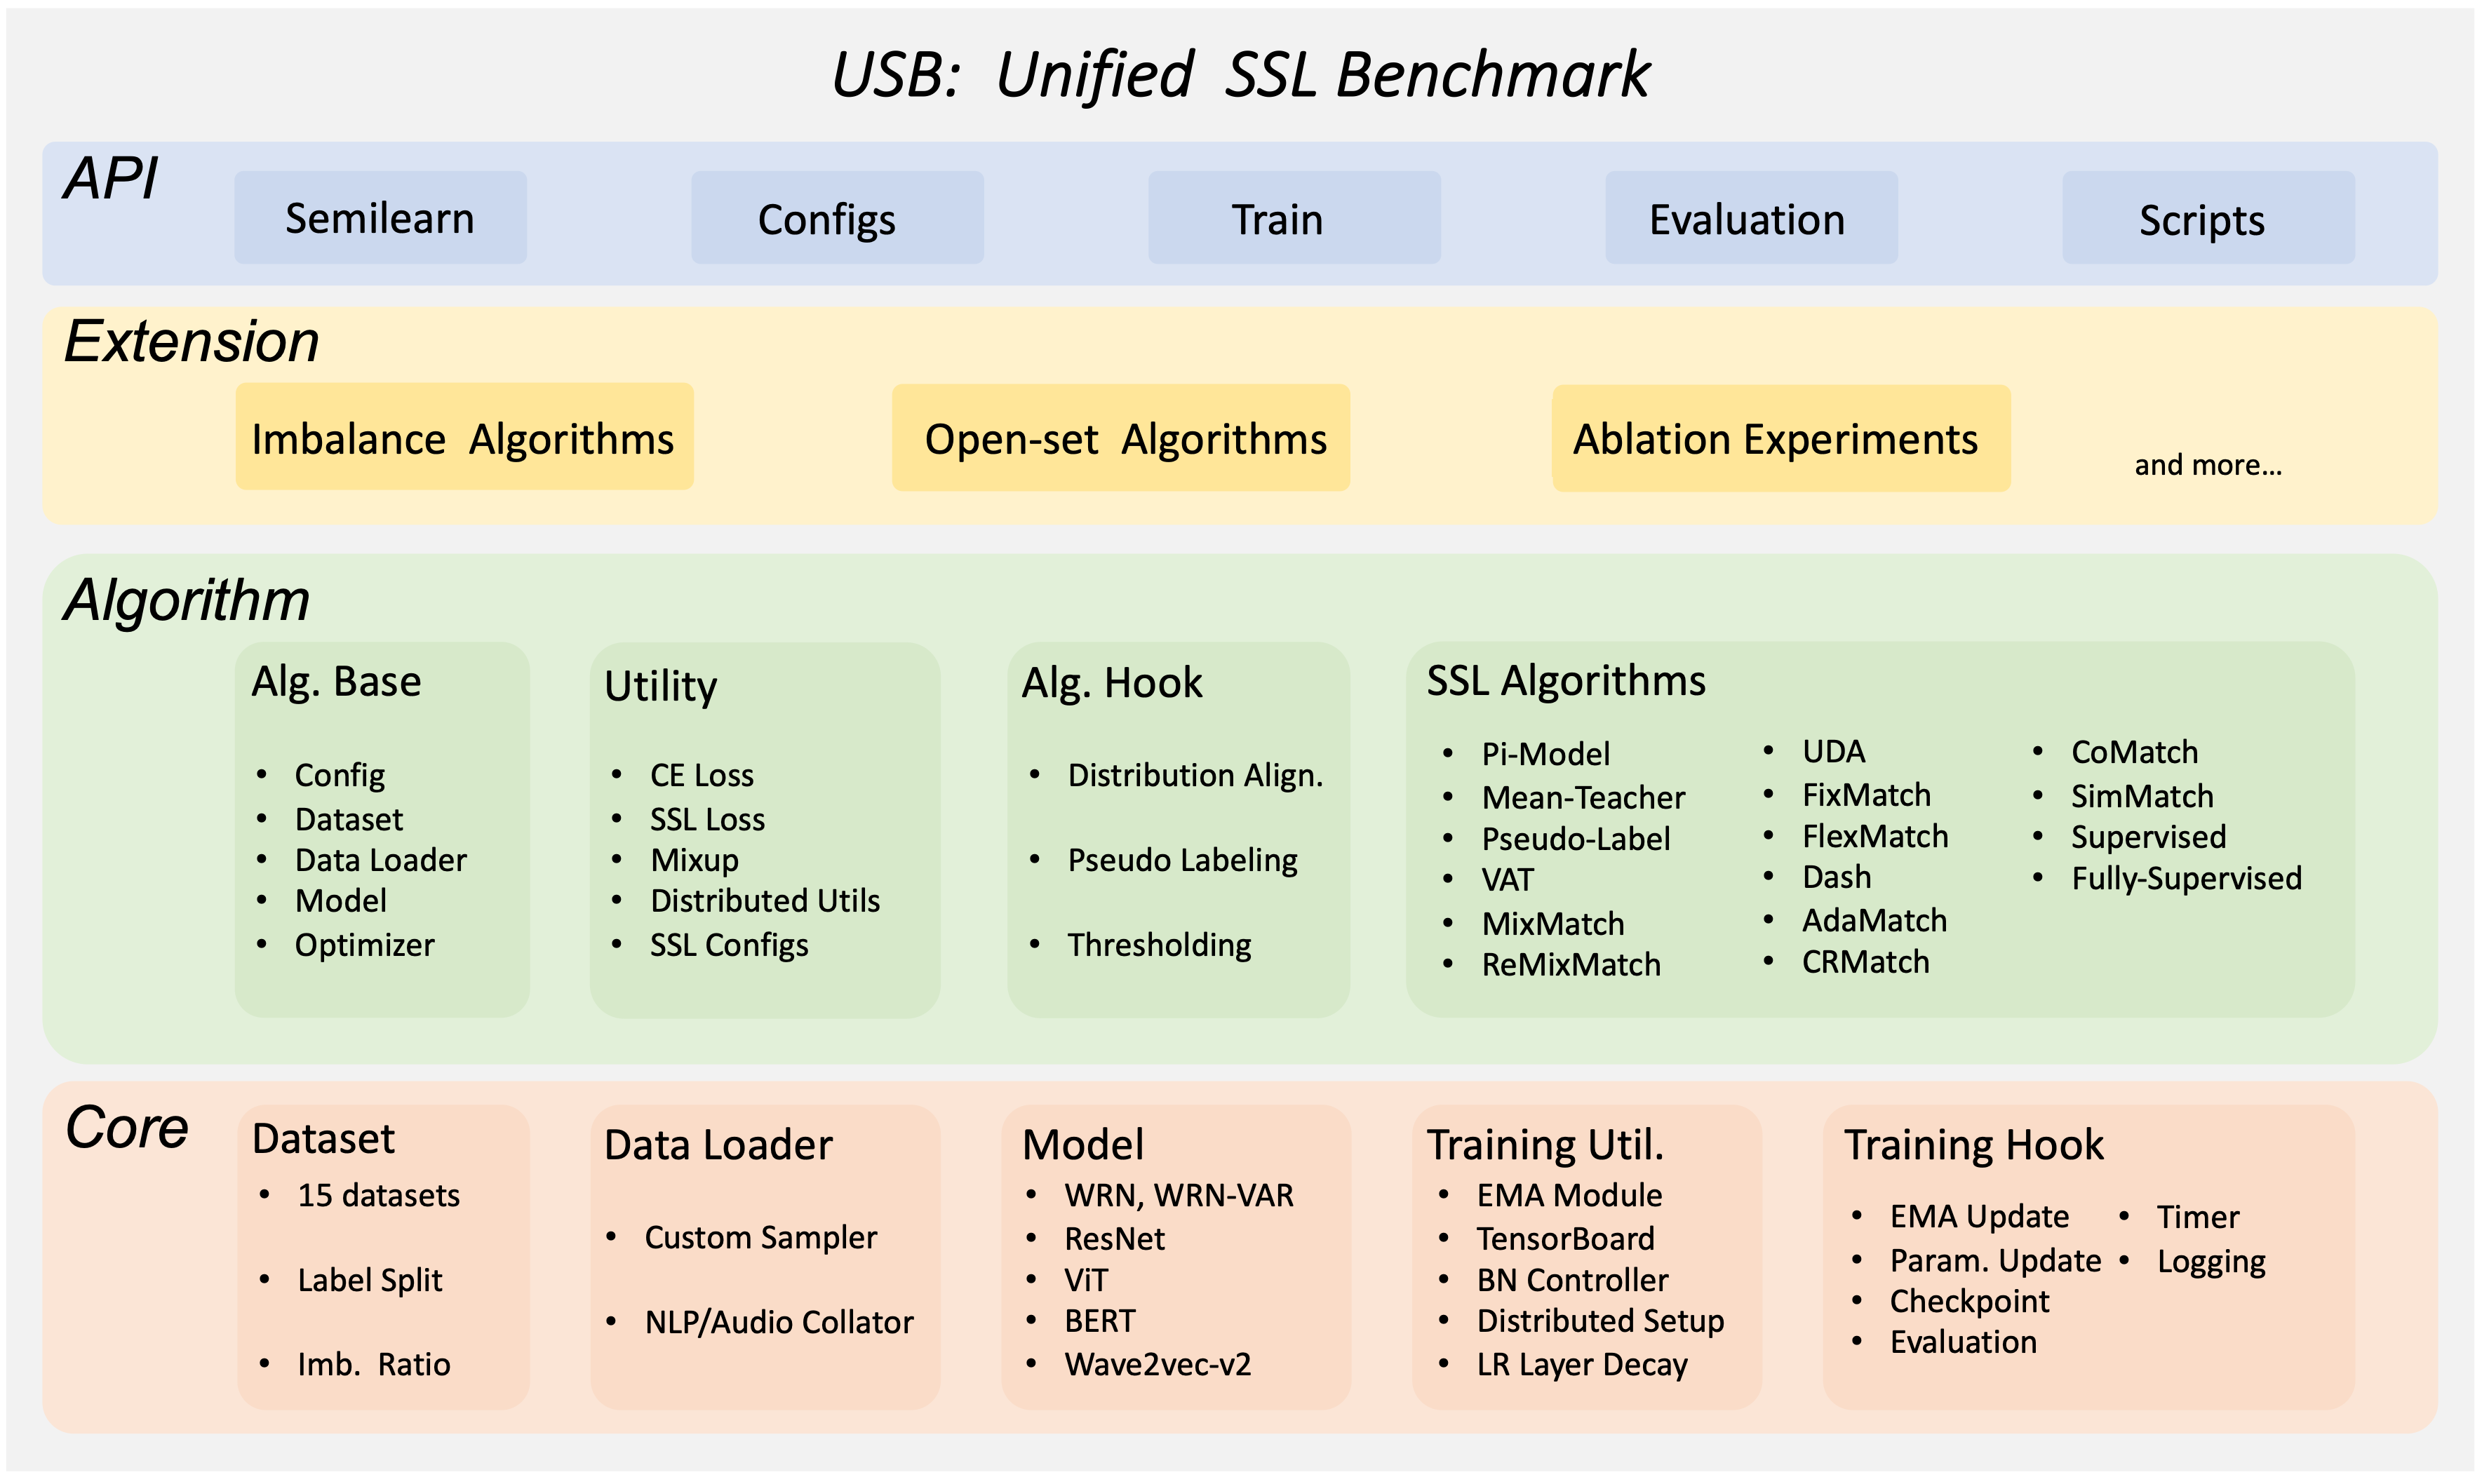

## **Use USB to Train FreeMatch/SoftMatch on CIFAR-10 with only 40 labels**

In [ ]:
!pip install semilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 80.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.3/183.3 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 146.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.4 MB/s eta 0:00:00
  Created wheel for aim-ui: filename=aim_ui-3.29.1-py3-none-any.whl size=31195131 sha256=ec214d2dca0c3eb0c2cbdaa5d9a229e8eb53237070b89d9062ed45766c8ac802
  Stored in directory: /root/.cache/pip/wheels/66/52/46/97539bf69f8ac8071748157cd8354

In [ ]:
import semilearn
from semilearn import get_dataset, get_data_loader, get_net_builder, get_algorithm, get_config, Trainer

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [ ]:
config = {
    'algorithm': 'freematch',
    'net': 'vit_tiny_patch2_32',
    'use_pretrain': True,
    'pretrain_path': 'https://github.com/microsoft/Semi-supervised-learning/releases/download/v.0.0.0/vit_tiny_patch2_32_mlp_im_1k_32.pth',

    # optimization configs
    'epoch': 1,
    'num_train_iter': 500,
    'num_eval_iter': 500,
    'num_log_iter': 50,
    'optim': 'AdamW',
    'lr': 5e-4,
    'layer_decay': 0.5,
    'batch_size': 16,
    'eval_batch_size': 16,


    # dataset configs
    'dataset': 'cifar10',
    'num_labels': 40,
    'num_classes': 10,
    'img_size': 32,
    'crop_ratio': 0.875,
    'data_dir': './data',
    'ulb_samples_per_class': None,

    # algorithm specific configs
    'hard_label': True,
    'T': 0.5,
    'ema_p': 0.999,
    'ent_loss_ratio': 0.001,
    'uratio': 2,
    'ulb_loss_ratio': 1.0,

    # device configs
    'gpu': 0,
    'world_size': 1,
    'distributed': False,
    "num_workers": 4,
}
config = get_config(config)

## **Loading the dataset**

In [ ]:
dataset_dict = get_dataset(config,
                           config.algorithm,
                           config.dataset,
                           config.num_labels,
                           config.num_classes,
                           data_dir=config.data_dir,
                           include_lb_to_ulb=config.include_lb_to_ulb)
train_lb_loader = get_data_loader(config,
                                  dataset_dict['train_lb'],
                                  config.batch_size)
train_ulb_loader = get_data_loader(config,
                                   dataset_dict['train_ulb'],
                                   int(config.batch_size * config.uratio))
eval_loader = get_data_loader(config,
                              dataset_dict['eval'],
                              config.eval_batch_size)
algorithm = get_algorithm(config,
                          get_net_builder(config.net,
                                                   from_name=False),
                          tb_log=None,
                          logger=None)

100%|██████████| 170M/170M [00:04<00:00, 40.4MB/s]


lb count: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
ulb count: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


/usr/local/lib/python3.12/dist-packages/semilearn/core/algorithmbase.py:83: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.loss_scaler = GradScaler()


lb count: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
ulb count: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
unlabeled data number: 50000, labeled data number 40
Create train and test data loaders
[!] data loader keys: dict_keys(['train_lb', 'train_ulb', 'eval'])
Downloading: "https://github.com/microsoft/Semi-supervised-learning/releases/download/v.0.0.0/vit_tiny_patch2_32_mlp_im_1k_32.pth" to /root/.cache/torch/hub/checkpoints/vit_tiny_patch2_32_mlp_im_1k_32.pth


100%|██████████| 115M/115M [00:04<00:00, 28.3MB/s]


_IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=[])
Create optimizer and scheduler


In [ ]:
trainer = Trainer(config, algorithm)
trainer.fit(train_lb_loader, train_ulb_loader, eval_loader)

Epoch: 0
50 iteration USE_EMA: True, train/sup_loss: 2.2717, train/unsup_loss: 0.4869, train/total_loss: 2.7334, train/util_ratio: 1.0000, train/run_time: 0.2024, lr: 0.0005, train/prefetch_time: 0.0042 
100 iteration USE_EMA: True, train/sup_loss: 1.3009, train/unsup_loss: 0.6856, train/total_loss: 1.9610, train/util_ratio: 1.0000, train/run_time: 0.2043, lr: 0.0005, train/prefetch_time: 0.0044 
150 iteration USE_EMA: True, train/sup_loss: 0.7696, train/unsup_loss: 1.2053, train/total_loss: 1.9572, train/util_ratio: 1.0000, train/run_time: 0.2046, lr: 0.0005, train/prefetch_time: 0.0041 
200 iteration USE_EMA: True, train/sup_loss: 0.2607, train/unsup_loss: 1.5191, train/total_loss: 1.7723, train/util_ratio: 1.0000, train/run_time: 0.2051, lr: 0.0004, train/prefetch_time: 0.0045 
250 iteration USE_EMA: True, train/sup_loss: 0.3374, train/unsup_loss: 1.2785, train/total_loss: 1.6059, train/util_ratio: 1.0000, train/run_time: 0.2077, lr: 0.0004, train/prefetch_time: 0.0039 
300 iteratio

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


confusion matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
model saved: ./saved_models/fixmatch/latest_model.pth
model saved: ./saved_models/fixmatch/model_best.pth
500 iteration, USE_EMA: True, train/sup_loss: 0.1085, train/unsup_loss: 1.1045, train/total_loss: 1.2082, train/util_ratio: 0.9375, train/run_time: 0.2156, eval/loss: 6.4029, eval/top-1-acc: 0.1004, eval/balanced_acc: 0.1000, eval/precision: 0.0100, eval/recall: 0.1000, eval/F1: 0.0182, lr: 0.0001, train/prefetch_time: 0.0037 BEST_EVAL_ACC: 0.1004, at 500 iters
model saved: ./saved_models/fixmatch/latest_model.pth
model saved: ./saved_models/fixmatch/model_best.pth


In [ ]:
trainer.evaluate(eval_loader)

{'acc': 0.792625,
 'precision': 0.8545614123042616,
 'recall': 0.7924385543481984,
 'f1': 0.7949643092886289}

## **Use USB to Train SoftMatch with specific imbalanced algorithm on imbalanced CIFAR-10**

In [ ]:
config = {
    'algorithm': 'softmatch',
    'net': 'vit_tiny_patch2_32',
    'use_pretrain': True,
    'pretrain_path': 'https://github.com/microsoft/Semi-supervised-learning/releases/download/v.0.0.0/vit_tiny_patch2_32_mlp_im_1k_32.pth',

    # optimization configs
    'epoch': 1,
    'num_train_iter': 500,
    'num_eval_iter': 500,
    'num_log_iter': 50,
    'optim': 'AdamW',
    'lr': 5e-4,
    'layer_decay': 0.5,
    'batch_size': 16,
    'eval_batch_size': 16,


    # dataset configs
    'dataset': 'cifar10',
    'num_labels': 1500,
    'num_classes': 10,
    'img_size': 32,
    'crop_ratio': 0.875,
    'data_dir': './data',
    'ulb_samples_per_class': None,
    'lb_imb_ratio': 10,
    'ulb_imb_ratio': 10,
    'ulb_num_labels': 3000,

    # algorithm specific configs
    'hard_label': True,
    'T': 0.5,
    'ema_p': 0.999,
    'ent_loss_ratio': 0.001,
    'uratio': 2,
    'ulb_loss_ratio': 1.0,

    # device configs
    'gpu': 0,
    'world_size': 1,
    'distributed': False,
    "num_workers": 4,
}
config = get_config(config)

In [ ]:
dataset_dict = get_dataset(config,
                           config.algorithm,
                           config.dataset,
                           config.num_labels,
                           config.num_classes,
                           data_dir=config.data_dir,
                           include_lb_to_ulb=config.include_lb_to_ulb)
train_lb_loader = get_data_loader(config,
                                  dataset_dict['train_lb'],
                                  config.batch_size)
train_ulb_loader = get_data_loader(config,
                                   dataset_dict['train_ulb'],
                                   int(config.batch_size * config.uratio))
eval_loader = get_data_loader(config,
                              dataset_dict['eval'],
                              config.eval_batch_size)
algorithm = get_algorithm(config,
                          get_net_builder(config.net, from_name=False),
                          tb_log=None,
                          logger=None)

lb count: [1500, 1161, 899, 696, 539, 417, 323, 250, 193, 150]
ulb count: [4500, 3483, 2697, 2088, 1617, 1251, 969, 750, 580, 450]


/usr/local/lib/python3.12/dist-packages/semilearn/core/algorithmbase.py:83: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.loss_scaler = GradScaler()


lb count: [1500, 1161, 899, 696, 539, 417, 323, 250, 193, 150]
ulb count: [4500, 3483, 2697, 2088, 1617, 1251, 969, 750, 580, 450]
unlabeled data number: 18385, labeled data number 6128
Create train and test data loaders
[!] data loader keys: dict_keys(['train_lb', 'train_ulb', 'eval'])
_IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=[])
Create optimizer and scheduler
distribution alignment p_target: tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


In [ ]:
trainer = Trainer(config, algorithm)
trainer.fit(train_lb_loader, train_ulb_loader, eval_loader)

Epoch: 0
50 iteration USE_EMA: True, train/sup_loss: 2.2804, train/unsup_loss: 0.8844, train/total_loss: 3.1649, train/util_ratio: 1.0000, train/run_time: 0.2101, lr: 0.0005, train/prefetch_time: 0.0046 
100 iteration USE_EMA: True, train/sup_loss: 1.8425, train/unsup_loss: 0.5339, train/total_loss: 2.3765, train/util_ratio: 1.0000, train/run_time: 0.2125, lr: 0.0005, train/prefetch_time: 0.0043 
150 iteration USE_EMA: True, train/sup_loss: 1.1507, train/unsup_loss: 0.7681, train/total_loss: 1.9188, train/util_ratio: 1.0000, train/run_time: 0.2120, lr: 0.0005, train/prefetch_time: 0.0040 
200 iteration USE_EMA: True, train/sup_loss: 0.6149, train/unsup_loss: 0.8184, train/total_loss: 1.4333, train/util_ratio: 1.0000, train/run_time: 0.2135, lr: 0.0004, train/prefetch_time: 0.0040 
250 iteration USE_EMA: True, train/sup_loss: 1.0280, train/unsup_loss: 0.9592, train/total_loss: 1.9873, train/util_ratio: 1.0000, train/run_time: 0.2119, lr: 0.0004, train/prefetch_time: 0.0040 
300 iteratio

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


confusion matrix:
[[0.         0.         0.04975124 0.38432836 0.         0.
  0.         0.         0.00373134 0.56218905]
 [0.         0.         0.00495663 0.49318463 0.         0.00123916
  0.         0.         0.00123916 0.49938042]
 [0.         0.         0.56218905 0.31965174 0.         0.
  0.         0.         0.         0.1181592 ]
 [0.         0.         0.00501882 0.97992472 0.         0.00125471
  0.         0.         0.         0.01380176]
 [0.         0.         0.17412935 0.62064677 0.         0.
  0.         0.         0.         0.20522388]
 [0.         0.         0.04198473 0.71374046 0.         0.05979644
  0.         0.         0.         0.18447837]
 [0.         0.         0.02533172 0.7840772  0.         0.
  0.         0.         0.         0.19059107]
 [0.         0.         0.14724712 0.44558259 0.         0.
  0.         0.         0.         0.40717029]
 [0.         0.         0.         0.02615193 0.         0.
  0.         0.         0.00622665 0.96762

In [ ]:
trainer.evaluate(eval_loader)

{'acc': 0.85975,
 'precision': 0.9024007643395839,
 'recall': 0.8580657817234251,
 'f1': 0.8437017722429285}

### **Key difference** in accuracy - difference in dataset configs:
1. * 'dataset': 'cifar10',
   * 'num_labels': 40,
   * 'num_classes': 10,
   * 'img_size': 32,
   * 'crop_ratio': 0.875,
   * 'data_dir': './data',
   * 'ulb_samples_per_class': None,
2. * 'dataset': 'cifar10',
   * 'num_labels': 1500,
   * 'num_classes': 10,
   * 'img_size': 32,
   * 'crop_ratio': 0.875,
   * 'data_dir': './data',
   * 'ulb_samples_per_class': None,
   * 'lb_imb_ratio': 10,
   * 'ulb_imb_ratio': 10,
   * 'ulb_num_labels': 3000,
   ### With more num_classes (40 vs 1500) and special params like lb_imb_ratio, ulb_imb_ratio, ulb_num_labels, accuracy growed from 79.26% to 85.98%, precision growed from 85.46% to 90.24%, Recall from 79.24% to 85.81% and F1 from 79.50 to 84.37%. Training with USB + SoftMatch with specific imbalanced algorithm on imbalanced CIFAR-10 showed improvement in results.